# System Dynamics - Diffusion of Innovations


#### Više o Teoriji difuzije inovacija:
https://en.wikipedia.org/wiki/Diffusion_of_innovations

Diffusion of innovations is a theory that seeks to explain how, why, and at what rate new ideas and technology spread. Everett Rogers, a professor of communication studies, popularized the theory in his book Diffusion of Innovations; the book was first published in 1962, and is now in its fifth edition (2003). Rogers argues that diffusion is the process by which an innovation is communicated over time among the participants in a social system. The origins of the diffusion of innovations theory are varied and span multiple disciplines.


Rogers proposes that four main elements influence the spread of a new idea: the innovation itself, communication channels, time, and a social system. This process relies heavily on human capital. The innovation must be widely adopted in order to self-sustain. Within the rate of adoption, there is a point at which an innovation reaches critical mass.


The categories of adopters are innovators, early adopters, early majority, late majority, and laggards. Diffusion manifests itself in different ways and is highly subject to the type of adopters and innovation-decision process. The criterion for the adopter categorization is innovativeness, defined as the degree to which an individual adopts a new idea.

### Konceptualni model

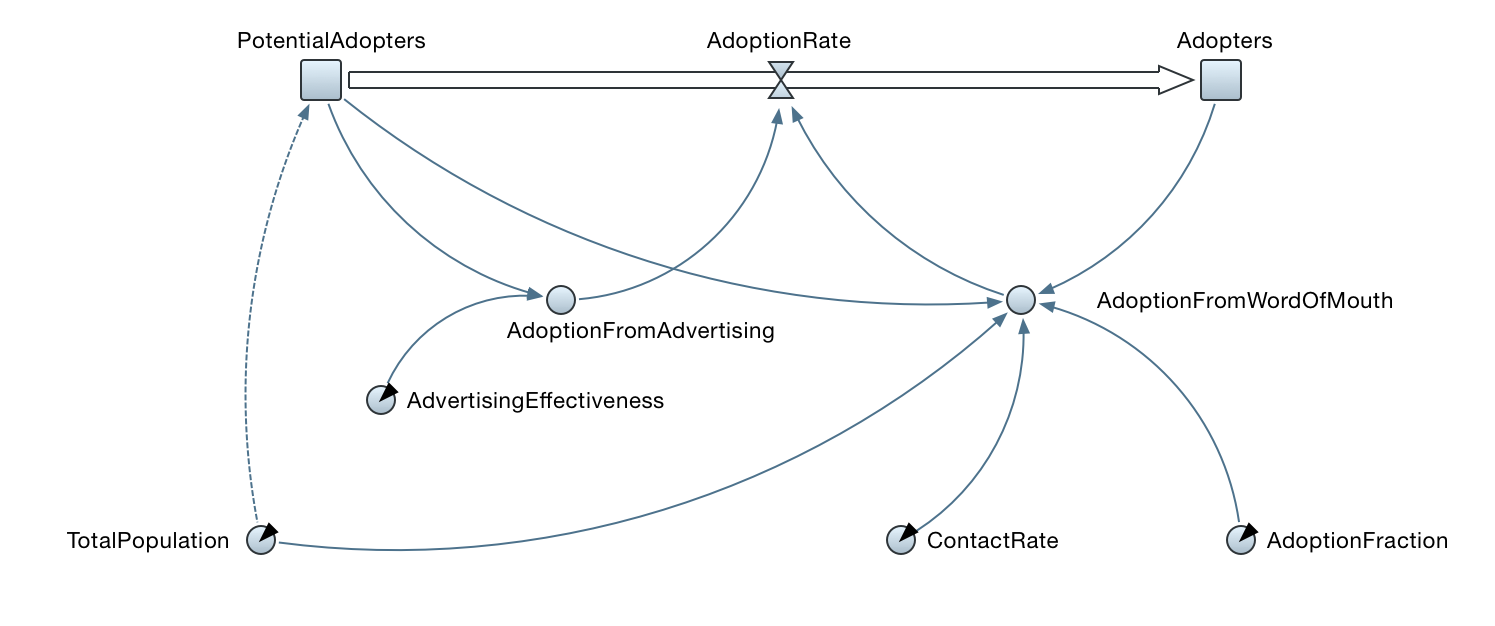

In [3]:
library("IRdisplay")
display_png(file="DOI-model-AnyLogic.png", width=800) 

### Učitavanje biblioteka

In [12]:
# install.packages("simecol")
library(deSolve, simecol)

# install.packages("latticeExtra")
library(ggplot2, lattice, latticeExtra)

# dodatni paketi
library(RColorBrewer)

### Definiranje modela

In [7]:
# AR - Adoption Rate, AFA - Adoption from Advertising, AFWOM - Adoption from Word of Mouth
# TP - Total Population, AF - Adoption Fraction, AE - Advertising Effectiveness
# CR - Contact Rate, PA - Potential Adopters, AD - Adopters

DOI <- new("odeModel",
           main = function (time, init, parms, ...) {
             x <- init
             p <- parms
             
             AFA    <- (x[1]*p["AE"])
             AFWOM  <- (x[1]*p["CR"]*p["AF"]*(x[2]/p["TP"])) 
             AR     <- ((x[1]*p["AE"]) + (x[1]*p["CR"]*p["AF"]*(x[2]/p["TP"])))
             
             dAD    <- ((x[1]*p["AE"]) + (x[1]*p["CR"]*p["AF"]*(x[2]/p["TP"])))
             dPA    <- - ((x[1]*p["AE"]) + (x[1]*p["CR"]*p["AF"]*(x[2]/p["TP"])))
             
             list(c(dPA, dAD), AR, AFA, AFWOM)
           },
           parms  = c(TP=10000, AF=0.015, AE=0.011, CR=100),
           times  = c(from=0, to=8, by=0.1),
           init   = c(PA=10000, AD=0),
           solver = "rk4")

### Izvođenje simulacije i spremanje rezultata u tablicu

In [21]:
DOI <- sim(DOI)

#plot(DOI)

DOI.data <- out(DOI)

names(DOI.data)[1] <- "Year"
names(DOI.data)[4] <- "AR"
names(DOI.data)[5] <- "AFA"
names(DOI.data)[6] <- "AFWOM"

DOI.data$Type <- "Model simulation"

head(DOI.data)

Year,PA,AD,AR,AFA,AFWOM,Type
0.0,10000.000,0.00000,110.0000,110.0000,0.00000,Model simulation
0.1,9988.140,11.86041,127.6390,109.8695,17.76951,Model simulation
0.2,9974.380,25.62005,148.0498,109.7182,38.33162,Model simulation
0.3,9958.424,41.57645,171.6480,109.5427,62.10538,Model simulation
0.4,9939.929,60.07142,198.9051,109.3392,89.56585,Model simulation
0.5,9918.503,81.49693,230.3527,109.1035,121.24913,Model simulation


### Crtanje grafa s podacima iz tablice

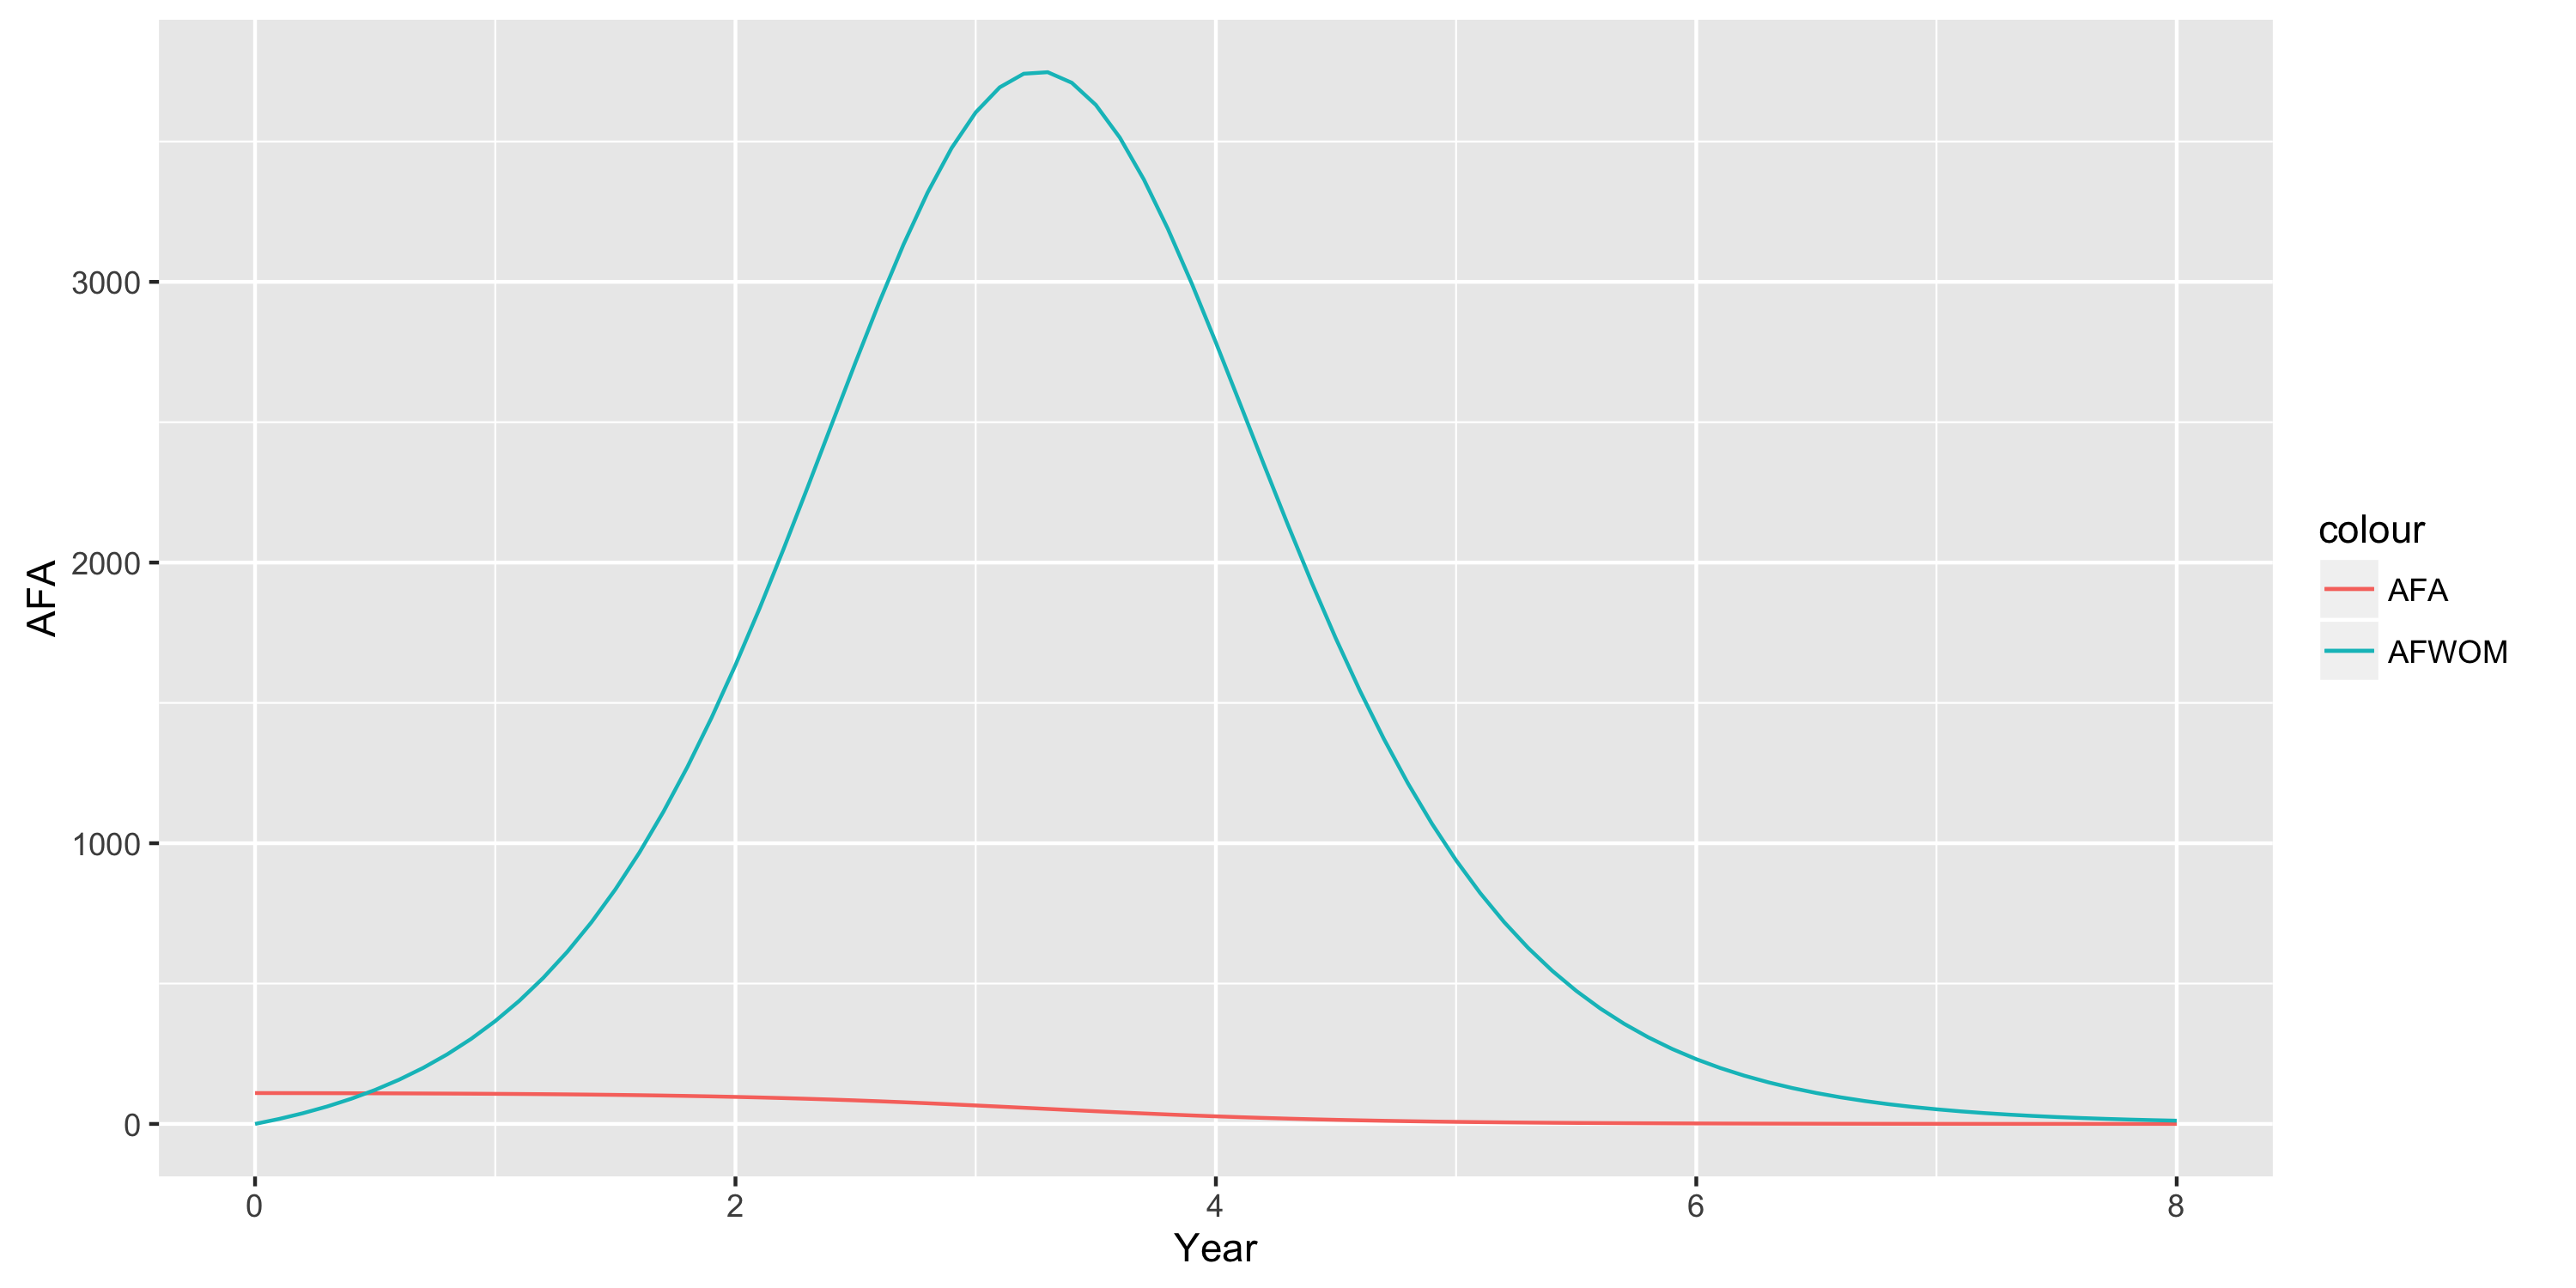

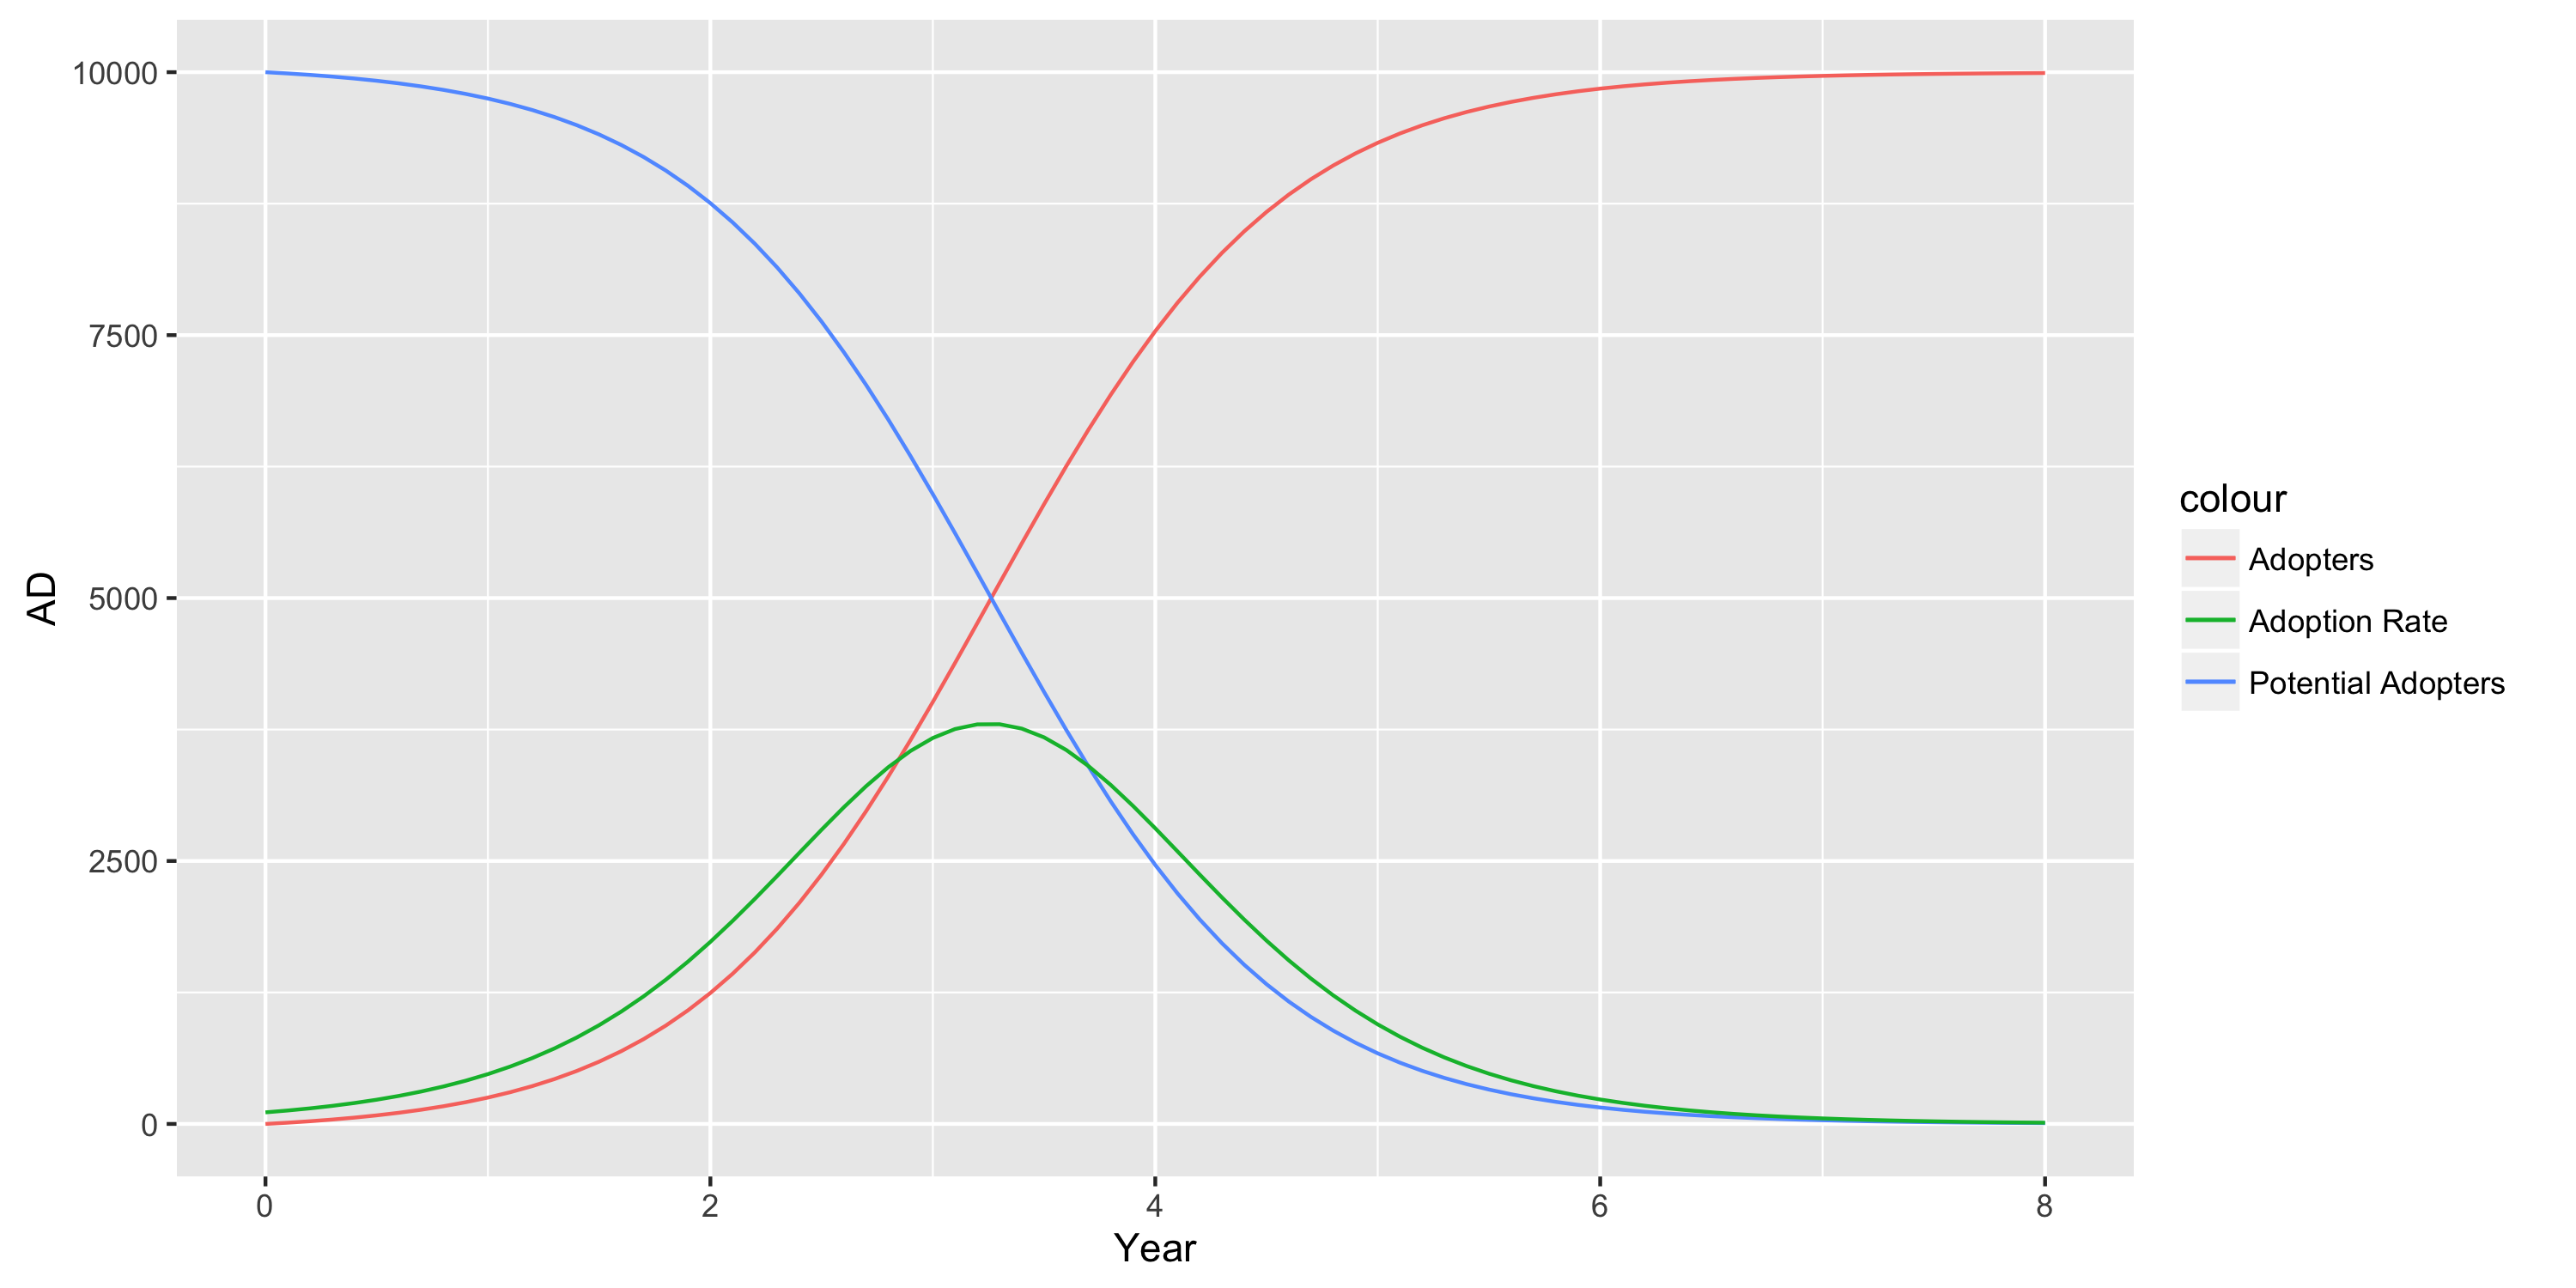

In [20]:
# parametri prikaza
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=300)
par(mfrow=c(1,1))

ggplot(DOI.data, aes(Year)) + 
  geom_line(aes(y = AFA, colour = "AFA")) + 
  geom_line(aes(y = AFWOM, colour = "AFWOM"))

ggplot(DOI.data, aes(Year)) + 
  geom_line(aes(y = AD, colour = "Adopters")) +
  geom_line(aes(y = PA, colour = "Potential Adopters")) +
  geom_line(aes(y = AR, colour = "Adoption Rate"))
  